# Normalidade e outras métricas de dispersão

## Objetivo: Demonstrar o conceito de normalidade nos dados, e apresentar métricas de dispersão (desvio padrão, assimetria e curtose).

In [2]:
import pandas as pd

df = pd.read_csv('materiais de aula/survey_results_public.csv', index_col='ResponseId')
df

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,I am a developer by profession,"Employed, full-time",Fully remote,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy,8,5,...,30-60 minutes a day,Less than 15 minutes a day,Just right,DevOps function;Microservices;Developer portal...,Yes,Yes,Yes,Too long,Easy,NaN
73265,I am a developer by profession,"Employed, full-time",Full in-person,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,6,5,...,15-30 minutes a day,60-120 minutes a day,Very long,None of these,No,Yes,Yes,Too long,Easy,NaN
73266,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Programming Games;Stac...,Udemy;Codecademy;Pluralsight;edX,42,33,...,30-60 minutes a day,60-120 minutes a day,Just right,None of these,No,No,No,Appropriate in length,Easy,NaN


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_context('notebook')

### O conceito de normalidade

Em muitas análises estatísticas, é preciso que nossos dados possuam algumas características específicas que nos permitam aplicar certos testes e conceitos.

Uma destas características é a **normalidade**, isto é, seguir o formato geral de uma curva normal:

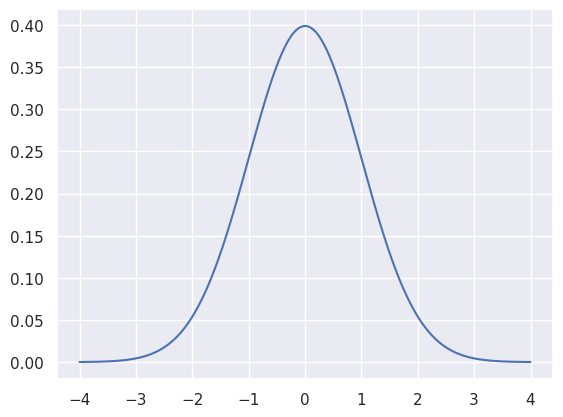

In [191]:
import numpy as np
from scipy.stats import norm

xs = np.linspace(-4, 4, 1000)
ys = norm().pdf(xs)

sns.lineplot(x=xs, y=ys)
plt.show()

Lembrando que os parâmetros de uma curva normal são:
- A média, representando a posição central do pico da curva
- O desvio padrão, representando a dispersão dos dados a partir do pico


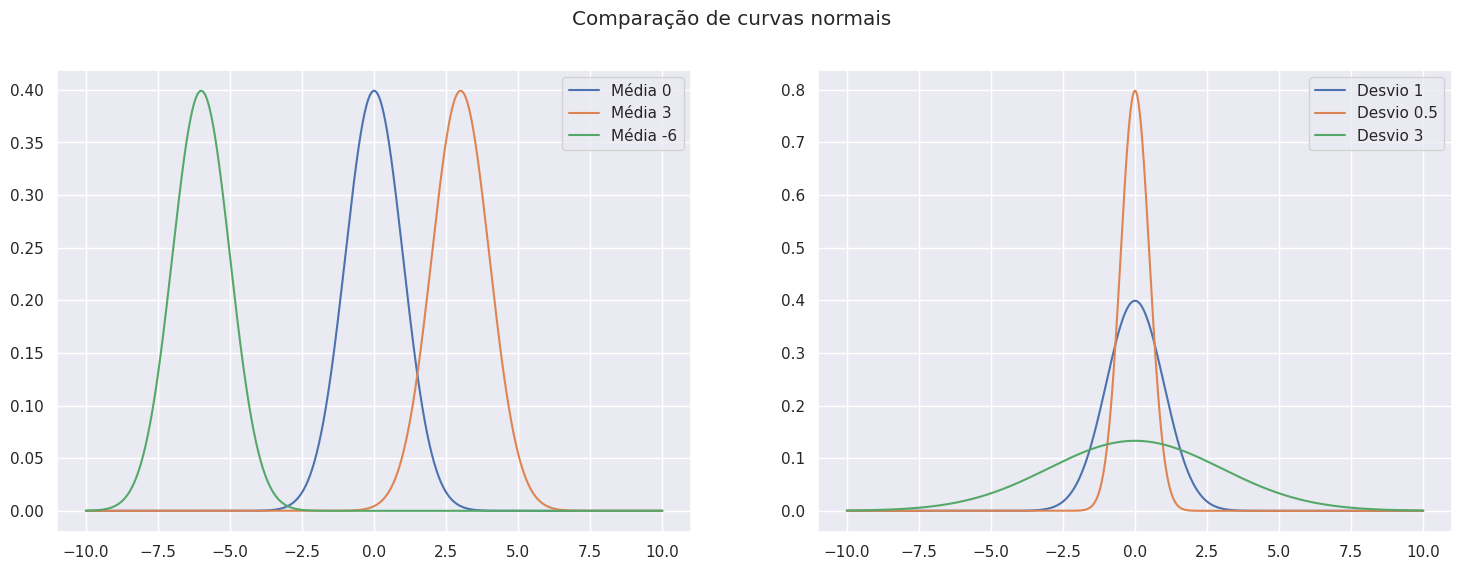

In [195]:
import numpy as np
from scipy.stats import norm

xs = np.linspace(-10, 10, 1000)

fig, (ax_esq, ax_dir) = plt.subplots(figsize=(18, 6), ncols=2)

ax_esq.plot(xs, norm(loc=0, scale=1).pdf(xs), label='Média 0')
ax_esq.plot(xs, norm(loc=3, scale=1).pdf(xs), label='Média 3')
ax_esq.plot(xs, norm(loc=-6, scale=1).pdf(xs), label='Média -6')
ax_esq.legend()

ax_dir.plot(xs, norm(loc=0, scale=1).pdf(xs), label='Desvio 1')
ax_dir.plot(xs, norm(loc=0, scale=0.5).pdf(xs), label='Desvio 0.5')
ax_dir.plot(xs, norm(loc=0, scale=3).pdf(xs), label='Desvio 3')
ax_dir.legend()

fig.suptitle('Comparação de curvas normais')
plt.show()

Embora não faremos testes estatísticos nesse curso, é importante ter o conceito de normalidade claro durante a etapa de exploração.

Vamos avaliar se a distribuição da coluna `"WorkExp"` se parece com uma curva normal:

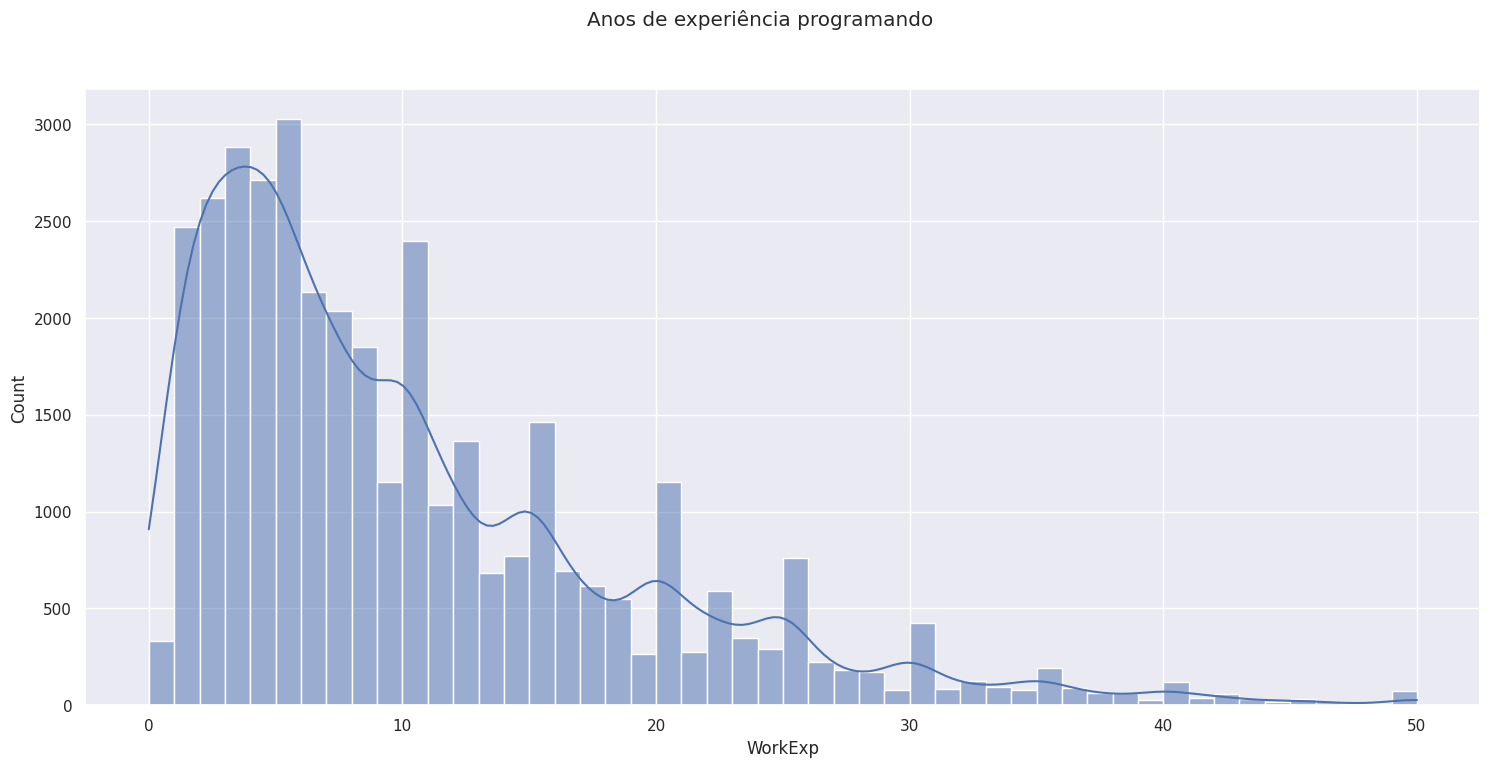

In [213]:
fig, ax = plt.subplots(figsize=(18, 8))

sns.histplot(data=df, ax=ax, x='WorkExp', binwidth=1.0, kde=True)
fig.suptitle('Anos de experiência programando')

plt.show()

Apenas olhando para a curva, está claro que a distribuição não segue a normalidade.

Contudo, para termos certeza, vamos compará-la com o que seria esperado de uma curva normal, dado a média e o desvio padrão dos nossos dados:

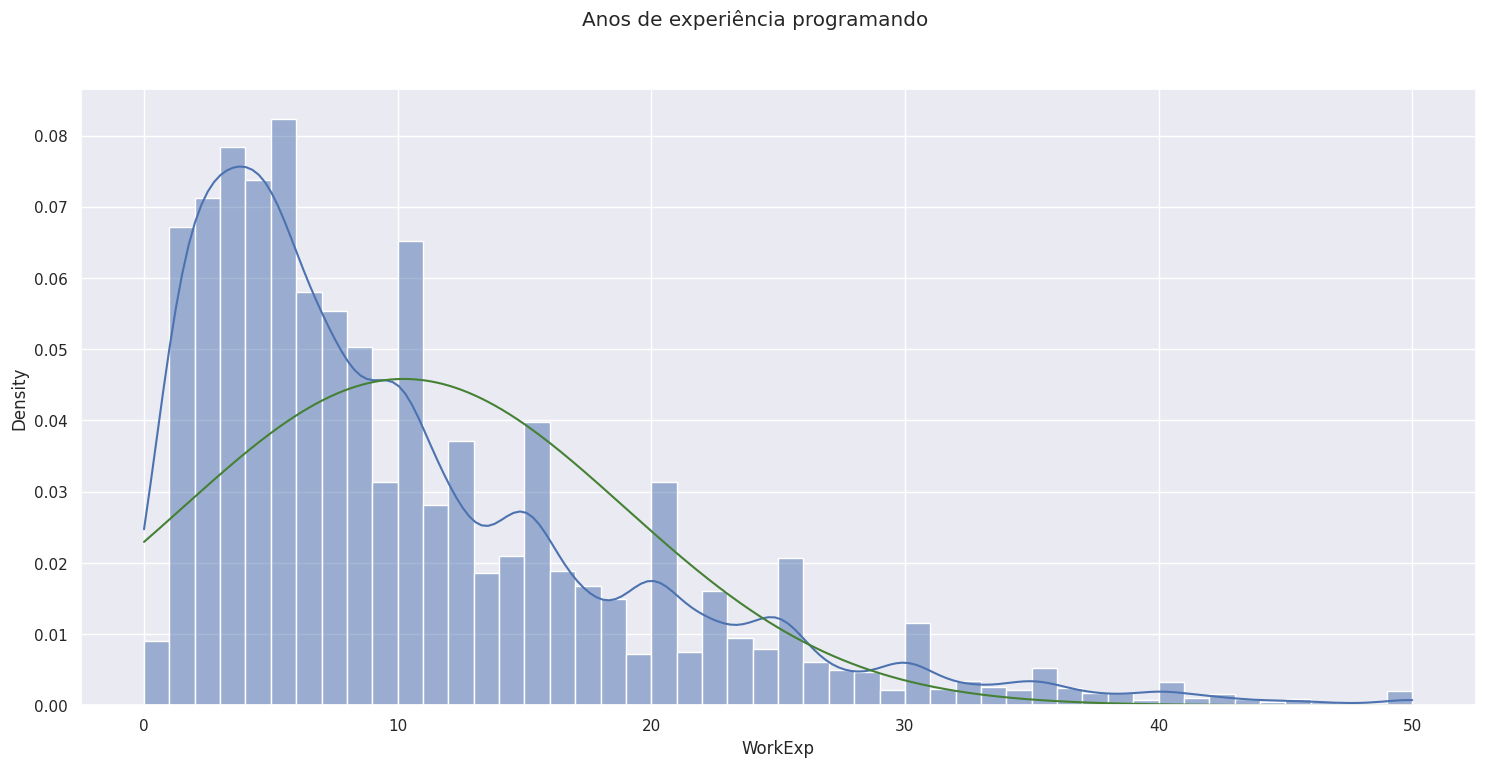

In [214]:
import numpy as np
from scipy.stats import norm

media = df['WorkExp'].mean()
desvio = df['WorkExp'].std()
v_min = df['WorkExp'].min()
v_max = df['WorkExp'].max()

xs = np.linspace(v_min, v_max, 10_000)
ys = norm.pdf(xs, loc=media, scale=desvio)

fig, ax = plt.subplots(figsize=(18, 8))

sns.histplot(data=df, ax=ax, x='WorkExp', binwidth=1.0, kde=True, stat='density')
ax.plot(xs, ys, color='#458134')

fig.suptitle('Anos de experiência programando')
plt.show()

### Métricas de dispersão

Além da medida de desvio padrão, há duas outras medidas muito utilizadas para medirmos o formato dos nossos dados:
- **Assimetria** (*skewness*): mede o quanto a distribuição dos dados tem uma "cauda" para um dos lados
- **Curtose** (*kurtosis*): mede o quanto a distribuição é achatada (sem pico) ou afunilada (com pico)

Uma distribuição normal possui Assimetria = 0 e Curtose = 0:

In [217]:
dist_normal = norm().rvs(10_000)  # Valores sorteados da distribuição normal

print('Assimetria dist. normal:', pd.Series(dist_normal).skew())
print('Curtose dist. normal:', pd.Series(dist_normal).kurtosis())

Assimetria dist. normal: -0.015097638565826674
Curtose dist. normal: 0.005789116316816667


Vamos medir estes valores para nossos dados, e compará-los com a distribuição normal:

In [218]:
dist_normal = norm().rvs(10_000)  # Valores sorteados da distribuição normal

print('Assimetria dados:', df['WorkExp'].skew())
print('Assimetria dist. normal:', pd.Series(dist_normal).skew())
print('-----')
print('Curtose dados:', df['WorkExp'].kurtosis())
print('Curtose dist. normal:', pd.Series(dist_normal).kurtosis())

Assimetria dados: 1.4409481289144255
Assimetria dist. normal: -0.004705435035294077
-----
Curtose dados: 2.1453144700502444
Curtose dist. normal: -0.0860983223771159


Os valores diferentes de zero possuem o seguinte significado:
- Assimetria > 0 -> cauda para direita
- Assimetria < 0 -> cauda para esquerda
- Curtose > 0 -> curva afunilada (com pico)
- Curtose < 0 -> curva achatada (sem pico)

### Transformações para obter normalidade

Podemos usar transformações matemáticas para tentar gerar dados próximos da normalidade.

Uma técnica comum para distribuições com assimetria positiva é usar o **logaritmo** dos valores de interesse. A distribuição tende a ficar mais "comportada".

Vamos tentar aplicá-la nos nossos dados:

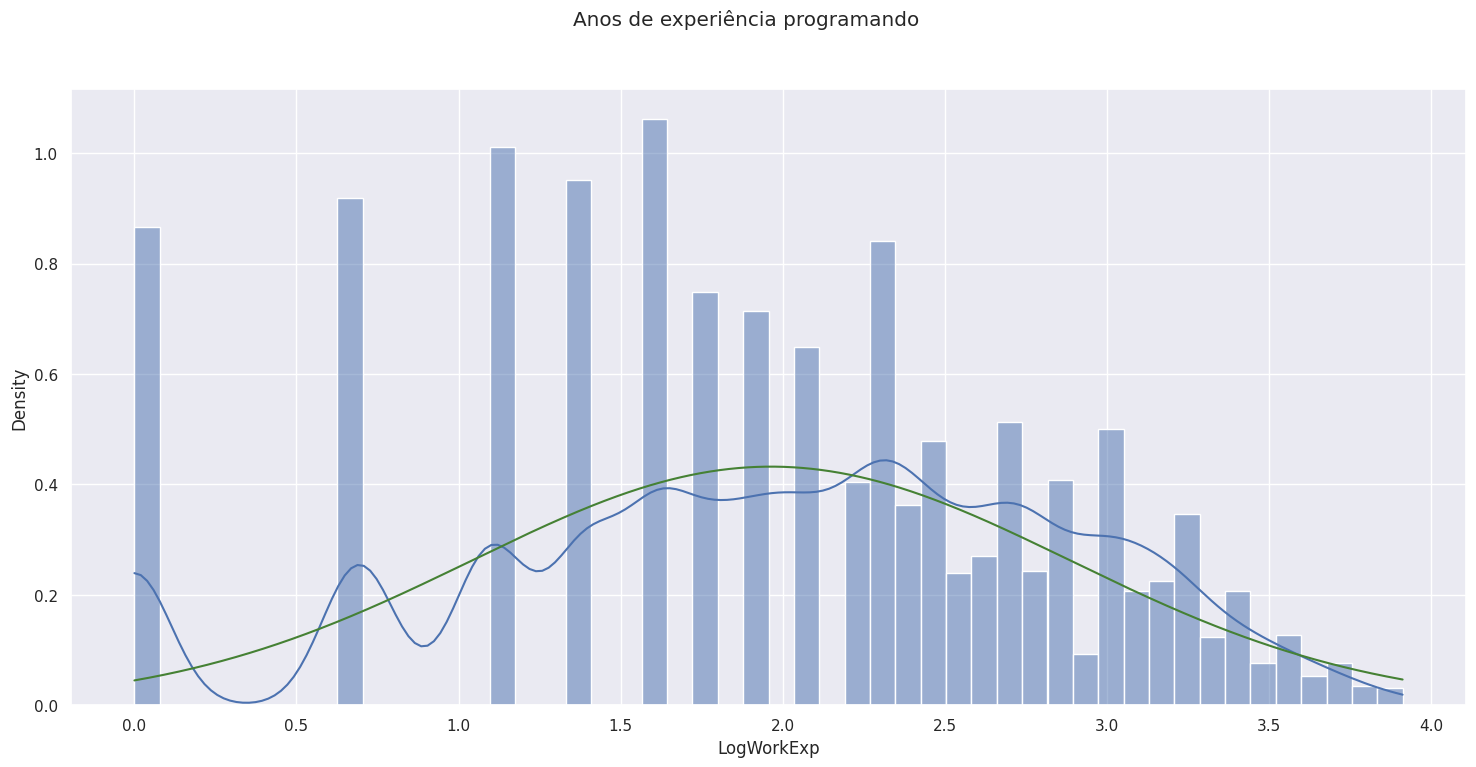

In [219]:
import numpy as np
from scipy.stats import norm

# Filtrar zeros para evitar indefinição em log(0)
work_exp = df['WorkExp'].loc[df['WorkExp'] > 0]

df['LogWorkExp'] = np.log(work_exp)

media_log = df['LogWorkExp'].mean()
desvio_log = df['LogWorkExp'].std()
v_min_log = df['LogWorkExp'].min()
v_max_log = df['LogWorkExp'].max()

xs = np.linspace(v_min_log, v_max_log, 10_000)
ys = norm.pdf(xs, loc=media_log, scale=desvio_log)

fig, ax = plt.subplots(figsize=(18, 8))

sns.histplot(data=df, ax=ax, x='LogWorkExp', kde=True, stat='density')
ax.plot(xs, ys, color='#458134')
fig.suptitle('Anos de experiência programando')

plt.show()

A distribuição dos dados ainda não se comporta exatamente como a curva normal, mas está mais próxima:

In [220]:
dist_normal = norm().rvs(10_000)  # Valores sorteados da distribuição normal

print('Assimetria dados:       ', df['WorkExp'].skew())
print('Assimetria dados log:   ', df['LogWorkExp'].skew())
print('Assimetria dist. normal:', pd.Series(dist_normal).skew())
print('-----')
print('Curtose dados:       ', df['WorkExp'].kurtosis())
print('Curtose dados log:   ', df['LogWorkExp'].kurtosis())
print('Curtose dist. normal:', pd.Series(dist_normal).kurtosis())

Assimetria dados:        1.4409481289144255
Assimetria dados log:    -0.35873679210475007
Assimetria dist. normal: 0.0021563380773437766
-----
Curtose dados:        2.1453144700502444
Curtose dados log:    -0.47281091150143384
Curtose dist. normal: 0.015859285509050913
